# #Amazon reviews using deep learning

In [424]:

import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer as sno
#setofstopwords=set(stopwords.words('english'))
#nltk.download('stopwords')


### Loading Csv file

In [425]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\Reviews.csv",nrows=20000)

data.shape


(20000, 10)

### Removing not helpful reviews

In [426]:
data['Score']=data['Score'].map(lambda x:'Positive' if x>3 else 'Negative')
sorteddata= data.sort_values('ProductId',axis=0)
finaldata= sorteddata.drop_duplicates(subset={'UserId','ProfileName',\
        'Time','Text'}, keep='first',inplace=False)

finaldata= finaldata[finaldata['HelpfulnessNumerator'] <= finaldata['HelpfulnessDenominator']]
data= finaldata.sort_values('Time',axis=0)
data.shape

(19316, 10)

### Cleaning HTML, punctuations, apply stemming, lowercasing etc without removing stopwords

In [427]:
def cleanhtml(sentance): #substitute expression contained in <> with ' '
    cleaned= re.sub(re.compile('<.*?>'),' ',sentance)
    return cleaned
#function for removing punctuations chars
def cleanpunc(sentance):
    cleaned= re.sub(r'[?|!|\'|"|#]',r'',sentance)
    cleaned= re.sub(r'[.|,|)|(|\|/]',r'',sentance)
    return cleaned
snowstem= sno('english')

i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
for sent in data['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        # we have used cleanpunc(w).split(), one more split function here 
        # because consider w="abc.def", cleanpunc(w) will return "abc def"
        # if we dont use .split() function then we will be considring "abc def" 
        # as a single word, but if you use .split() function we will get "abc", "def"
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                s=(snowstem.stem(cleaned_words.lower())).encode('utf8')
                filtered_sentence.append(s)
                if(data['Score'].values)[i] =='Positive':
                    all_positive_words.append(s)
                if(data['Score'].values)[i] =='Negative':
                    all_negative_words.append(s)
            else:
                continue
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    final_string.append(str1)

# storing data till now
data['CleanedText']=final_string 
#adding a column of CleanedText which displays the data after pre-processing of the review 
data['CleanedText']=data['CleanedText'].str.decode("utf-8")
    # store final table into an SQlLite table for future.
#conn = sqlite3.connect('cleanedTextData.sqlite')
#c=conn.cursor()
#conn.text_factory = str
#data.to_sql('Reviews', conn,  schema=None, if_exists='replace', \
     #   index=True, index_label=None, chunksize=None, dtype=None)
#conn.close()

In [428]:
data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
1244,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,Positive,961718400,Great Product,This was a really good idea and the final prod...,this was realli good idea and the final produc...
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,Positive,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,just receiv shipment and could hard wait tri t...
11990,11991,B0000T15M8,A2928LJN5IISB4,chatchi,5,5,Positive,1067990400,The fruits of my labor,When chatchi's favorite afternoon treat became...,when favorit afternoon treat becam mysteri una...
8110,8111,B0000EIE2Z,A3M174IC0VXOS2,Gail Cooke,3,3,Positive,1075420800,BEST BLUEBERRIES,In the winter when fresh blueberries exceed ou...,the winter when fresh blueberri exceed our foo...
11048,11049,B0000VYKXC,A3L88AH6MABEDL,Javier Denison,0,0,Positive,1081209600,Best coffee I've tasted. I try others but alwa...,If you like a strong but smooth flavorful coff...,you like strong but smooth flavor coffe this h...


In [429]:
data['Text'][2]

'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'

In [430]:
data['CleanedText'][2]

'this confect that has been around few centuri light pillowi citrus gelatin with nut this case filbert and cut into tini squar and then liber coat with powder sugar and tini mouth heaven not too chewi and veri flavor high recommend this yummi treat you are familiar with the stori lion the witch and the this the treat that seduc edmund into sell out his brother and sister the witch'

### Taking 100k datapoints

In [431]:
Data= data[:19000]
Data= Data[['CleanedText','Score']]
Data['Score']= Data['Score'].map(lambda x:1 if x=='Positive' else 0)

Data_x= Data['CleanedText']
Data_y= Data['Score']

In [432]:
Data_x.index= [i for i in range(0,19000)]
Data_x

0        this was realli good idea and the final produc...
1        just receiv shipment and could hard wait tri t...
2        when favorit afternoon treat becam mysteri una...
3        the winter when fresh blueberri exceed our foo...
4        you like strong but smooth flavor coffe this h...
5        mae ploy sweet chili sauc becom standard condi...
6        love the snack want buy bunch ship amazon more...
7        excel spread nutella and peanut butter sandwic...
8        this the best sandwich top grew eat branston p...
9        crazi you have soft spot for chuckl you know d...
10       perfect year round with just about ani meat di...
11       boyfriend use this stuff relig just cautious s...
12       this favorit starbuck roast but whi dont you j...
13       must good never lie even skizip like and all d...
14       search for food that full preserv and filler a...
15       honest cannot say that saw ani differ whatsoev...
16       honest have say that just buy this varieti loo.

### Making Vocabulary set and Frequency dictionary of words

In [433]:
# collecting all words in single list
list_= []
for i in Data_x:
    list_ += i
list_= ''.join(list_)
allWords=list_.split()


In [434]:
allWords

['this',
 'was',
 'realli',
 'good',
 'idea',
 'and',
 'the',
 'final',
 'product',
 'outstand',
 'use',
 'the',
 'decal',
 'car',
 'window',
 'and',
 'everybodi',
 'ask',
 'where',
 'bought',
 'the',
 'decal',
 'made',
 'two',
 'thumbjust',
 'receiv',
 'shipment',
 'and',
 'could',
 'hard',
 'wait',
 'tri',
 'this',
 'product',
 'love',
 'which',
 'what',
 'call',
 'them',
 'instead',
 'sticker',
 'becaus',
 'they',
 'can',
 'remov',
 'easili',
 'daughter',
 'design',
 'sign',
 'print',
 'revers',
 'use',
 'her',
 'car',
 'window',
 'they',
 'print',
 'beauti',
 'have',
 'print',
 'program',
 'go',
 'have',
 'lot',
 'fun',
 'with',
 'this',
 'product',
 'becaus',
 'there',
 'are',
 'window',
 'everywher',
 'and',
 'other',
 'surfac',
 'like',
 'screen',
 'and',
 'comput',
 'monitorwhen',
 'favorit',
 'afternoon',
 'treat',
 'becam',
 'mysteri',
 'unavail',
 'the',
 'vend',
 'machin',
 'work',
 'chatchi',
 'panick',
 'how',
 'would',
 'chatchi',
 'get',
 'through',
 'the',
 'work',
 'd

In [435]:
vocabulary= set(allWords)
vocabulary

{'exclus',
 'ponder',
 'popcornlove',
 'orangina',
 'youthey',
 'disappointcadburi',
 'overindulgwas',
 'hassel',
 'crack',
 'poundgoccia',
 'travl',
 'texturecrunchi',
 'drinknormal',
 'kobe',
 'curtail',
 'bankgreat',
 'hockey',
 'againtheir',
 'wasoh',
 'squees',
 'deliv',
 'regularokay',
 'subcontin',
 'vinci',
 'voltagyou',
 'partigunpowd',
 'frucos',
 'herethese',
 'stuffuse',
 'yourselvthese',
 'sigh',
 'wrapafter',
 'macchiado',
 'useboth',
 'bonk',
 'throughnow',
 'predispos',
 'chooselet',
 'stomachthese',
 'kolkata',
 'outhard',
 'pricecould',
 'howevjust',
 'pricebest',
 'farpurchas',
 'recommenddiet',
 'versa',
 'insul',
 'onetrue',
 'smoothi',
 'statehood',
 'wound',
 'mentionwhile',
 'burnharden',
 'granual',
 'strung',
 'reckon',
 'bunchlook',
 'zest',
 'cruz',
 'inner',
 'twilight',
 'favoritsugar',
 'envirokid',
 'togeth',
 'manhol',
 'forabsolut',
 'freak',
 'quantitithis',
 'goosefoot',
 'saladsoupsandwichetc',
 'trapveri',
 'placerecommend',
 'purist',
 'mofoveri',

In [436]:
vocabulary_list= list(vocabulary)
vocabulary_list

['exclus',
 'ponder',
 'popcornlove',
 'orangina',
 'youthey',
 'disappointcadburi',
 'overindulgwas',
 'hassel',
 'crack',
 'poundgoccia',
 'travl',
 'texturecrunchi',
 'drinknormal',
 'kobe',
 'curtail',
 'bankgreat',
 'hockey',
 'againtheir',
 'wasoh',
 'squees',
 'deliv',
 'regularokay',
 'subcontin',
 'vinci',
 'voltagyou',
 'partigunpowd',
 'frucos',
 'herethese',
 'stuffuse',
 'yourselvthese',
 'sigh',
 'wrapafter',
 'macchiado',
 'useboth',
 'bonk',
 'throughnow',
 'predispos',
 'chooselet',
 'stomachthese',
 'kolkata',
 'outhard',
 'pricecould',
 'howevjust',
 'pricebest',
 'farpurchas',
 'recommenddiet',
 'versa',
 'insul',
 'onetrue',
 'smoothi',
 'statehood',
 'wound',
 'mentionwhile',
 'burnharden',
 'granual',
 'strung',
 'reckon',
 'bunchlook',
 'zest',
 'cruz',
 'inner',
 'twilight',
 'favoritsugar',
 'envirokid',
 'togeth',
 'manhol',
 'forabsolut',
 'freak',
 'quantitithis',
 'goosefoot',
 'saladsoupsandwichetc',
 'trapveri',
 'placerecommend',
 'purist',
 'mofoveri',

In [437]:
#frequency dictionary
freq_dict= {}
for word in vocabulary_list:
    freq_dict[word]= allWords.count(word)

In [438]:
freq_dict

{'exclus': 31,
 'ponder': 3,
 'popcornlove': 1,
 'orangina': 26,
 'youthey': 1,
 'disappointcadburi': 1,
 'overindulgwas': 1,
 'hassel': 2,
 'crack': 66,
 'poundgoccia': 1,
 'travl': 1,
 'texturecrunchi': 1,
 'drinknormal': 1,
 'kobe': 2,
 'curtail': 3,
 'bankgreat': 1,
 'hockey': 2,
 'againtheir': 1,
 'wasoh': 1,
 'squees': 1,
 'deliv': 273,
 'regularokay': 1,
 'subcontin': 1,
 'vinci': 1,
 'voltagyou': 1,
 'partigunpowd': 1,
 'frucos': 1,
 'herethese': 3,
 'stuffuse': 1,
 'yourselvthese': 1,
 'sigh': 4,
 'wrapafter': 1,
 'macchiado': 1,
 'useboth': 1,
 'bonk': 1,
 'throughnow': 1,
 'predispos': 1,
 'chooselet': 1,
 'stomachthese': 1,
 'kolkata': 1,
 'outhard': 1,
 'pricecould': 1,
 'howevjust': 1,
 'pricebest': 2,
 'farpurchas': 1,
 'recommenddiet': 1,
 'versa': 2,
 'insul': 13,
 'onetrue': 1,
 'smoothi': 137,
 'statehood': 1,
 'wound': 6,
 'mentionwhile': 1,
 'burnharden': 1,
 'granual': 2,
 'strung': 3,
 'reckon': 3,
 'bunchlook': 1,
 'zest': 17,
 'cruz': 2,
 'inner': 21,
 'twiligh

In [439]:
import pickle
with open('freq_dict.pkl','wb') as file:
    pickle.dump(freq_dict,file)

### Creating rank list of frequent words upto 5000

In [440]:
from operator import itemgetter
sorted_list= []
for k, v in sorted(freq_dict.items(), key=itemgetter(1),reverse=True):
    sorted_list.append(k)

In [441]:
sorted_list

['the',
 'and',
 'this',
 'for',
 'that',
 'but',
 'with',
 'have',
 'are',
 'not',
 'you',
 'was',
 'they',
 'like',
 'tast',
 'these',
 'them',
 'flavor',
 'good',
 'coffe',
 'one',
 'can',
 'use',
 'just',
 'product',
 'veri',
 'tri',
 'all',
 'great',
 'love',
 'from',
 'when',
 'has',
 'make',
 'would',
 'get',
 'will',
 'more',
 'food',
 'other',
 'tea',
 'had',
 'than',
 'out',
 'buy',
 'dog',
 'about',
 'some',
 'onli',
 'eat',
 'realli',
 'time',
 'much',
 'drink',
 'too',
 'your',
 'becaus',
 'also',
 'were',
 'littl',
 'bag',
 'price',
 'order',
 'treat',
 'find',
 'there',
 'which',
 'best',
 'even',
 'cup',
 'mix',
 'what',
 'been',
 'better',
 'amazon',
 'well',
 'ani',
 'sugar',
 'she',
 'store',
 'after',
 'chocol',
 'want',
 'now',
 'look',
 'give',
 'their',
 'our',
 'water',
 'brand',
 'sweet',
 'first',
 'box',
 'year',
 'then',
 'think',
 'found',
 'recommend',
 'made',
 'chip',
 'her',
 'over',
 'packag',
 'high',
 'way',
 'say',
 'day',
 'most',
 'work',
 'bit',


In [442]:
Data_x[1]

'just receiv shipment and could hard wait tri this product love which what call them instead sticker becaus they can remov easili daughter design sign print revers use her car window they print beauti have print program go have lot fun with this product becaus there are window everywher and other surfac like screen and comput monitor'

In [443]:
top_words= 5000
sorted_list= sorted_list[:5000]

### Transforming Sentences of words to sequence of rank number of words

In [444]:
column=[]
for sent in Data_x:
    lis=[]
    for word in sent.split():
        if word in sorted_list:
            lis.append(word)
    column.append(' '.join(lis))

In [445]:
with open('column.pkl','wb') as file:
    pickle.dump(column,file)

In [446]:
final_x=[]
for sent in Data_x:
    lis=[]
    for word in sent.split():
        if word in sorted_list:
            lis.append(sorted_list.index(word)+1)
    final_x.append(lis)



In [447]:
Xtest= final_x[:18000]
Ytest= Data_y[:18000]
Xtrain= final_x[18000:]
Ytrain= Data_y[18000:]


In [448]:
print(Xtrain[1])

[160, 120, 46, 115, 37, 50, 237, 227, 14, 86, 17, 19, 1528, 39, 2, 1, 893, 62, 34, 659, 114, 1, 1979, 4275, 1979, 23, 29, 295, 5, 99, 206, 46, 39, 5, 85, 14, 1185, 39, 10, 3, 85, 211, 2, 33, 1, 162, 2233, 562, 46, 1815, 1, 553, 791, 28, 1223, 46, 14, 2, 950, 7, 255, 271, 39, 46, 212, 2307, 87, 553, 95, 1045, 307, 336, 17, 166, 155, 2, 888, 4, 6, 186, 655, 13, 235, 1451, 169, 136, 50, 747, 143, 1259, 13, 9, 13, 50, 60, 6, 235, 334, 346, 261, 87, 553, 2, 753, 826, 46, 39, 35, 145, 98, 440, 85, 1320, 2, 427, 15, 1, 162, 1, 105, 46, 9, 791]


## Applying LSTM models

In [449]:
from keras.preprocessing import sequence
max_review_length=600
Xtrain = sequence.pad_sequences(Xtrain, maxlen=max_review_length)
Xtest= sequence.pad_sequences(Xtest, maxlen=max_review_length)  

In [450]:
print(Xtrain[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### LSTM Models


In [452]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

### Model 1

In [453]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 600, 32)           160032    
_________________________________________________________________
lstm_43 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 213,333
Trainable params: 213,333
Non-trainable params: 0
_________________________________________________________________
None


In [454]:


history=  model.fit(Xtrain, Ytrain,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(Xtest, Ytest))# Final evaluation of the model
scores = model.evaluate(Xtest, Ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 1000 samples, validate on 18000 samples
Epoch 1/10
1000/1000 [==============================] - 634s 634ms/step - loss: 0.6295 - accuracy: 0.7470 - val_loss: 0.5425 - val_accuracy: 0.7719
Epoch 2/10
1000/1000 [==============================] - 294s 294ms/step - loss: 0.5405 - accuracy: 0.7720 - val_loss: 0.5235 - val_accuracy: 0.7719
Epoch 3/10
1000/1000 [==============================] - 311s 311ms/step - loss: 0.4957 - accuracy: 0.7720 - val_loss: 0.5062 - val_accuracy: 0.7719
Epoch 4/10
1000/1000 [==============================] - 317s 317ms/step - loss: 0.4169 - accuracy: 0.7730 - val_loss: 0.7151 - val_accuracy: 0.7722
Epoch 5/10
1000/1000 [==============================] - 297s 297ms/step - loss: 0.3895 - accuracy: 0.8680 - val_loss: 0.4588 - val_accuracy: 0.7859
Epoch 6/10
1000/1000 [==============================] - 295s 295ms/step - loss: 0.2452 - accuracy: 0.8940 - val_loss: 0.4612 - val_accuracy: 0.7967
Epoch 7/10
1000/1000 [==============================] - 305s 30

In [455]:
#import pickle
#with open('model.pkl','rb') as file:
#    model=pickle.load(file)
#with open('model2.pkl','rb') as file:
#    model2=pickle.load(file) 

In [456]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [457]:
score= model.evaluate(Xtest, Ytest, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  0.5955392420159445
Test accuracy:  0.7815555334091187


<IPython.core.display.Javascript object>


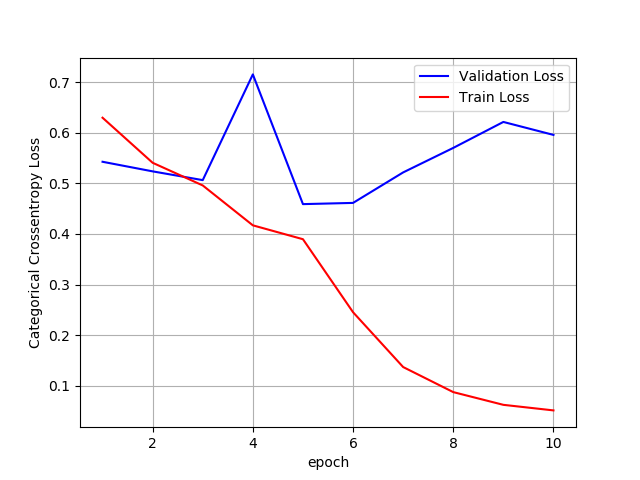

In [458]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,11))
vy = model.history.history['val_loss']
ty = model.history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model 2 

In [459]:
# create the model
embedding_vecor_length = 32
model2 = Sequential()
model2.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model2.add(LSTM(100,return_sequences=True))
model2.add(Dropout(0.25))
model2.add(LSTM(80))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 600, 32)           160032    
_________________________________________________________________
lstm_44 (LSTM)               (None, 600, 100)          53200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 600, 100)          0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 80)                57920     
_________________________________________________________________
dropout_27 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 81        
Total params: 271,233
Trainable params: 271,233
Non-trainable params: 0
_______________________________________________

In [460]:
history2=  model2.fit(Xtrain, Ytrain,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(Xtest, Ytest))# Final evaluation of the model
scores = model2.evaluate(Xtest, Ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 1000 samples, validate on 18000 samples
Epoch 1/10
1000/1000 [==============================] - 620s 620ms/step - loss: 0.6035 - accuracy: 0.7560 - val_loss: 0.5555 - val_accuracy: 0.7719
Epoch 2/10
1000/1000 [==============================] - 590s 590ms/step - loss: 0.5343 - accuracy: 0.7720 - val_loss: 0.5357 - val_accuracy: 0.7719
Epoch 3/10
1000/1000 [==============================] - 585s 585ms/step - loss: 0.5133 - accuracy: 0.7720 - val_loss: 0.5070 - val_accuracy: 0.7719
Epoch 4/10
1000/1000 [==============================] - 591s 591ms/step - loss: 0.3858 - accuracy: 0.8170 - val_loss: 0.4290 - val_accuracy: 0.8018
Epoch 5/10
1000/1000 [==============================] - 586s 586ms/step - loss: 0.1810 - accuracy: 0.9450 - val_loss: 0.5157 - val_accuracy: 0.8027
Epoch 6/10
1000/1000 [==============================] - 596s 596ms/step - loss: 0.0839 - accuracy: 0.9770 - val_loss: 0.7905 - val_accuracy: 0.8055
Epoch 7/10
1000/1000 [==============================] - 592s 59

In [461]:
score= model2.evaluate(Xtest, Ytest, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1]) 

Test score:  1.018287318415112
Test accuracy:  0.7904999852180481


<IPython.core.display.Javascript object>


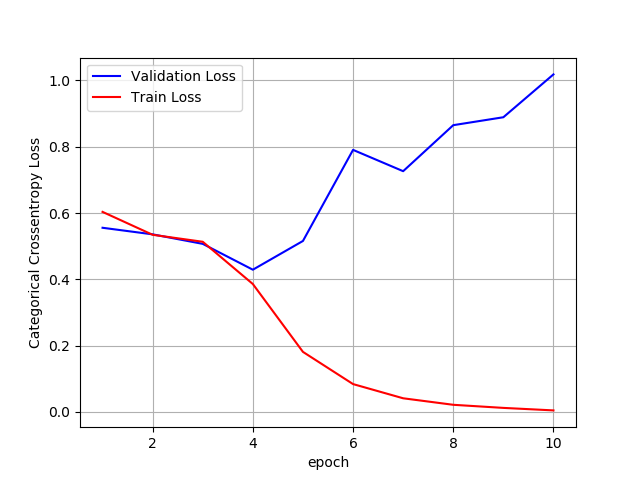

In [462]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,11))
vy = model2.history.history['val_loss']
ty = model2.history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model 3

In [468]:
#MODEL3
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, LSTM
from keras.regularizers import L1L2

reg = L1L2(0.01, 0.01)
model3 = Sequential()

# Add Embedding Layer
model3.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))

# Add batch normalization
model3.add(BatchNormalization())

# Add dropout
model3.add(Dropout(0.20))

# Add LSTM Layer 1
model3.add(LSTM(100,return_sequences=True,bias_regularizer=reg))

# Add dropout
model3.add(Dropout(0.20))

# Add LSTM Layer 2
model3.add(LSTM(80,return_sequences=True,bias_regularizer=reg))

# Add dropout
model3.add(Dropout(0.20))

# Add LSTM Layer 3
model3.add(LSTM(60,return_sequences=True,bias_regularizer=reg))

# Add dropout
model3.add(Dropout(0.30))

# Add LSTM Layer 4
model3.add(LSTM(40,return_sequences=True,bias_regularizer=reg))

# Add batch normalization
model3.add(BatchNormalization())

# Add dropout
model3.add(Dropout(0.40))

# Add LSTM Layer 5
model3.add(LSTM(20))

# Add dropout
model3.add(Dropout(0.50))

# Add Dense Layer
model3.add(Dense(1, activation='sigmoid'))
# Compile the model 
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Summary of the model
print("Model 3 Summary: \n")
print(model3.summary())

Model 3 Summary: 

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 600, 32)           160032    
_________________________________________________________________
batch_normalization_8 (Batch (None, 600, 32)           128       
_________________________________________________________________
dropout_28 (Dropout)         (None, 600, 32)           0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 600, 100)          53200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 600, 100)          0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 600, 80)           57920     
_________________________________________________________________
dropout_30 (Dropout)         (None

In [469]:
history3=  model3.fit(Xtrain, Ytrain,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(Xtest, Ytest))# Final evaluation of the model
scores = model3.evaluate(Xtest, Ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 1000 samples, validate on 18000 samples
Epoch 1/10
1000/1000 [==============================] - 980s 980ms/step - loss: 6.1318 - accuracy: 0.7360 - val_loss: 6.1538 - val_accuracy: 0.7068
Epoch 2/10
1000/1000 [==============================] - 949s 949ms/step - loss: 5.9713 - accuracy: 0.7670 - val_loss: 6.0033 - val_accuracy: 0.7506
Epoch 3/10
1000/1000 [==============================] - 949s 949ms/step - loss: 5.8563 - accuracy: 0.7710 - val_loss: 5.8537 - val_accuracy: 0.7717
Epoch 4/10
1000/1000 [==============================] - 929s 929ms/step - loss: 5.7009 - accuracy: 0.7710 - val_loss: 5.7033 - val_accuracy: 0.7719
Epoch 5/10
1000/1000 [==============================] - 940s 940ms/step - loss: 5.5559 - accuracy: 0.7710 - val_loss: 5.5667 - val_accuracy: 0.7719
Epoch 6/10
1000/1000 [==============================] - 945s 945ms/step - loss: 5.3441 - accuracy: 0.7980 - val_loss: 5.4350 - val_accuracy: 0.7719
Epoch 7/10
1000/1000 [==============================] - 951s 95

In [470]:
score= model3.evaluate(Xtest, Ytest, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  4.88863088607788
Test accuracy:  0.7719444632530212


<IPython.core.display.Javascript object>


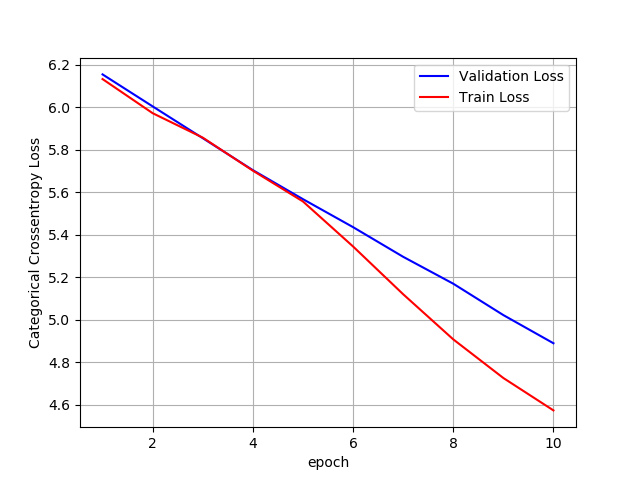

In [471]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,11))
vy = model3.history.history['val_loss']
ty = model3.history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model 4

In [472]:
#Model 4
from keras.layers import Bidirectional
from keras.layers import TimeDistributed

##########
embedding_vecor_length = 32
model4 = Sequential()
model4.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model4.add(Bidirectional(LSTM(100)))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())



Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 600, 32)           160032    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 200)               106400    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 201       
Total params: 266,633
Trainable params: 266,633
Non-trainable params: 0
_________________________________________________________________
None


In [473]:
history=  model4.fit(Xtrain, Ytrain,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(Xtest, Ytest))# Final evaluation of the model
scores = model4.evaluate(Xtest, Ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 1000 samples, validate on 18000 samples
Epoch 1/10
1000/1000 [==============================] - 815s 815ms/step - loss: 0.5988 - accuracy: 0.7670 - val_loss: 0.5331 - val_accuracy: 0.7719
Epoch 2/10
1000/1000 [==============================] - 576s 576ms/step - loss: 0.5283 - accuracy: 0.7720 - val_loss: 0.5269 - val_accuracy: 0.7719
Epoch 3/10
1000/1000 [==============================] - 569s 569ms/step - loss: 0.4824 - accuracy: 0.7720 - val_loss: 0.4873 - val_accuracy: 0.7719
Epoch 4/10
1000/1000 [==============================] - 639s 639ms/step - loss: 0.5803 - accuracy: 0.8110 - val_loss: 0.5417 - val_accuracy: 0.7798
Epoch 5/10
1000/1000 [==============================] - 634s 634ms/step - loss: 0.4193 - accuracy: 0.8030 - val_loss: 0.4829 - val_accuracy: 0.7727
Epoch 6/10
1000/1000 [==============================] - 616s 616ms/step - loss: 0.3135 - accuracy: 0.8230 - val_loss: 0.4511 - val_accuracy: 0.7936
Epoch 7/10
1000/1000 [==============================] - 734s 73

In [474]:
score= model4.evaluate(Xtest, Ytest, verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])
score

Test score:  0.6197606864505344
Test accuracy:  0.774055540561676


[0.6197606864505344, 0.774055540561676]

<IPython.core.display.Javascript object>


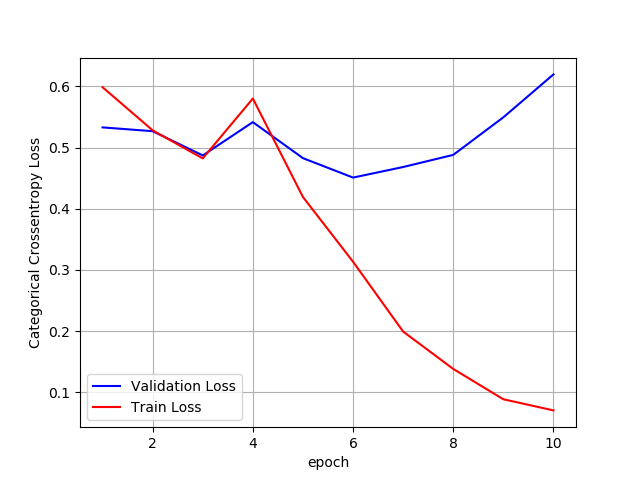

In [475]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,11))
vy = model4.history.history['val_loss']
ty = model4.history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Testing our model , using model 2 becuase it has highest accuracy compared to remaining models

In [480]:
# making a function which convert sentance to requred vectorized format that will feed well in model

def cleanhtml(sentance): #substitute expression contained in <> with ' '
    cleaned= re.sub(re.compile('<.*?>'),' ',sentance)
    return cleaned
#function for removing punctuations chars
def cleanpunc(sentance):
    cleaned= re.sub(r'[?|!|\'|"|#]',r'',sentance)
    cleaned= re.sub(r'[.|,|)|(|\|/]',r'',sentance)
    return cleaned
snowstem= sno('english')

def predict_this(sentance):
    i=0
    str1=' '
    final_string=[]
    all_positive_words=[] # store words from +ve reviews here
    all_negative_words=[] # store words from -ve reviews here.
    sent= sentance
    filtered_sentence=[]
    print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        # we have used cleanpunc(w).split(), one more split function here 
        # because consider w="abc.def", cleanpunc(w) will return "abc def"
        # if we dont use .split() function then we will be considring "abc def" 
        # as a single word, but if you use .split() function we will get "abc", "def"
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                s=(snowstem.stem(cleaned_words.lower())).encode('utf8')
                filtered_sentence.append(s)
                if(data['Score'].values)[i] =='Positive':
                    all_positive_words.append(s)
                if(data['Score'].values)[i] =='Negative':
                    all_negative_words.append(s)
            else:
                continue
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    final_string.append(str1)

    final_string
    for i in final_string:
        final_string=i.decode("utf-8")

    lis=[]
    for word in final_string.split():
        if word in sorted_list:
            lis.append(sorted_list.index(word)+1)

    final_string= lis
    final_string = sequence.pad_sequences([final_string], maxlen=max_review_length)
    print(final_string)
    what= ''
    if (round(float(model2.predict(final_string)))==1):
        what= 'Positive'
        acc= round(float(model2.predict(final_string))*100,2)
    else:
        what='Negative'
        acc= 100- round(float(model2.predict(final_string))*100,2)
    print(what,'review with',acc,'% Accuracy')

In [481]:
sentance= 'Good in taste'
predict_this(sentance)

Good in taste
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  

In [482]:
sentance= 'taste of chocolate was fantastic'
predict_this(sentance)



taste of chocolate was fantastic
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0

In [483]:
sentance= 'food was medium tasty'
predict_this(sentance)

food was medium tasty
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   

In [484]:
print(data['Text'][1])
predict_this(data['Text'][1])

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 

### Metrics on all the models**

In [476]:
#model 1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# predict probabilities for test set
yhat_probs = model.predict(Xtest, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(Xtest, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Ytest, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Ytest, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Ytest, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(Ytest, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Ytest, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Ytest, yhat_classes)
print(matrix)

Accuracy: 0.781556
Precision: 0.846925
Recall: 0.875207
F1 score: 0.860834
Cohens kappa: 0.353853
ROC AUC: 0.767958
[[ 1907  2198]
 [ 1734 12161]]


### Model2 metrics

In [477]:
#model2
# predict probabilities for test set
yhat_probs = model2.predict(Xtest, verbose=0)
# predict crisp classes for test set
yhat_classes = model2.predict_classes(Xtest, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Ytest, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Ytest, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Ytest, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(Ytest, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Ytest, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Ytest, yhat_classes)
print(matrix)

Accuracy: 0.790500
Precision: 0.847379
Recall: 0.888665
F1 score: 0.867531
Cohens kappa: 0.368284
ROC AUC: 0.777434
[[ 1881  2224]
 [ 1547 12348]]


### Model 3 metrics


In [478]:
#model3
# predict probabilities for test set
yhat_probs = model3.predict(Xtest, verbose=0)
# predict crisp classes for test set
yhat_classes = model3.predict_classes(Xtest, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Ytest, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Ytest, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Ytest, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(Ytest, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Ytest, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Ytest, yhat_classes)
print(matrix)

Accuracy: 0.771944
Precision: 0.771944
Recall: 1.000000
F1 score: 0.871296
Cohens kappa: 0.000000
ROC AUC: 0.733703
[[    0  4105]
 [    0 13895]]


### Model 4 Metrics

In [479]:
#model4
# predict probabilities for test set
yhat_probs = model4.predict(Xtest, verbose=0)
# predict crisp classes for test set
yhat_classes = model4.predict_classes(Xtest, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Ytest, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Ytest, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Ytest, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(Ytest, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Ytest, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Ytest, yhat_classes) 
print(matrix)

Accuracy: 0.774056
Precision: 0.872894
Recall: 0.827852
F1 score: 0.849777
Cohens kappa: 0.395478
ROC AUC: 0.788016
[[ 2430  1675]
 [ 2392 11503]]
